In [3]:
%matplotlib notebook

In [4]:
import os
import numpy as np
from glob import glob
import pickle
import ipywidgets as widgets
from IPython.display import display
from functools import partial

import matplotlib.pyplot as plt

#from bokeh.plotting import figure, output_file, show
#from bokeh.io import output_notebook
#from bokeh.layouts import row

<IPython.core.display.Javascript object>


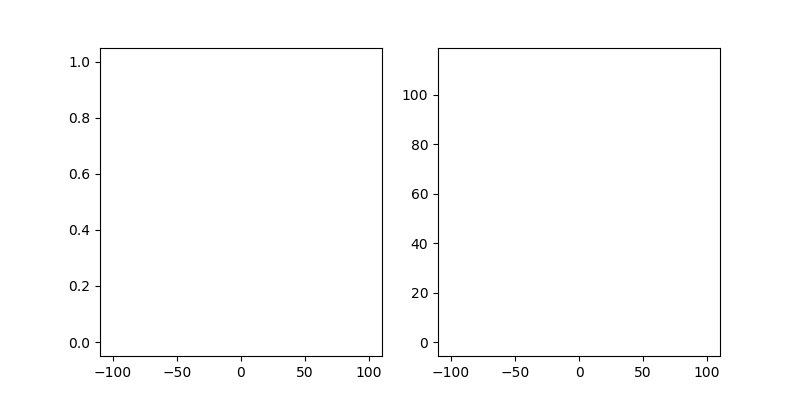

In [6]:
class Counter:
    def __init__(self, initial=0):
        self.value = initial

    def increment(self, amount=1):
        self.value += amount
        return self.value

    def decrement(self, amount=1):
        self.value -= amount
        return self.value
    
    def set_value(self, amount):
        self.value = amount
        return self.value
    
    def __iter__(self, sentinal=False):
        return iter(self.increment, sentinal)

def plot_figure(ax, rate_files):
    for rate_file in rate_files:
        with open(rate_file, 'r') as handle:
            data = np.loadtxt(handle)
            x = data[:, 0]
            y = data[:, 1]
            ax.plot(x, y, label=rate_file[:-8], marker='.')
    ax.legend()
    return ax

def refresh_figure(fig, foldername, axs):
    for ax in axs:
        ax.clear()
    fig.canvas.draw_idle()
    os.chdir(sub_channel+'/'+foldername)
    with open(glob('*.mod')[0], 'r') as handle:
        txt_area.value = handle.read()
    files = glob('*.dat')
    if not files: 
        pass
    else:
        rate_files = glob('*.inf.dat')
        rate_files.sort()
        plot_figure(axs[0], rate_files)
        axs[0].set_xlabel('Potential')
        axs[0].set_ylabel('Prob.opening')
        axs[0].set_title(foldername)
        tau_files = glob('*.tau.dat')
        tau_files.sort()
        plot_figure(axs[1], tau_files)
        axs[1].set_xlabel('Potential')
        #axs[1].set_ylabel('ms')
    os.chdir('../..')

counter = Counter()
sub_channel = 'icg-channels-Na'
all_channels = os.listdir(os.path.join('.', sub_channel))

#output_notebook()
#rates_fig = figure(width=400, height=400, tools="pan,box_zoom,reset,save", title="Rates",
#                   x_axis_label='Holding potential', y_axis_label='Prob. channel open')
#tau_fig = figure(width=400, height=400, tools="pan,box_zoom,reset,save", title="Tau",
#                   x_axis_label='Holding potential', y_axis_label='Prob. channel open')

fig = plt.figure(figsize=(8, 4))
rates_ax = fig.add_subplot(121)
tau_ax = fig.add_subplot(122)




next_button = widgets.Button(description='Next Channel',
                             disabled=False, button_style='')
prev_button = widgets.Button(description='Prev Channel',
                             disabled=False, button_style='')
txt_box = widgets.Text(value=str(all_channels[0]), description='Channel Name:',
                       disabled=True)
txt_area = widgets.Textarea(value='Hello World', description='MOD FILE',
                    disabled=False, layout=widgets.Layout(width='750px', height='200px'))

refresh_figure(fig, all_channels[0], [rates_ax, tau_ax])
plt.show()

def on_nxt_btn_clicked(counter, b):
    txt_box.value = all_channels[counter.increment()]
    refresh_figure(fig, txt_box.value, [rates_ax, tau_ax])
    fig.canvas.draw()
def on_prev_btn_clicked(counter, b):
    txt_box.value = all_channels[counter.decrement()]
    refresh_figure(fig, txt_box.value, [rates_ax, tau_ax])
    fig.canvas.draw()
    
next_button.on_click(partial(on_nxt_btn_clicked, counter))
prev_button.on_click(partial(on_prev_btn_clicked, counter))
items = [prev_button, txt_box, next_button]

widgets.HBox(items)

In [7]:
display(txt_area)